<a href="https://colab.research.google.com/github/JuanRaul23/portafolio-ciencia-de-datos/blob/master/riesgo_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Riesgo de Crédito

# Definición del Problema
## Objetivo
Predecir la probabilidad de incumplimiento de los clientes en sus obligaciones crediticias para mitigar pérdidas financieras y optimizar la asignación de créditos.

# Adquisición y Preparación de Datos

## Recolección de datos

In [2]:
import pandas as pd

# Cargar el dataset
dataset_path = '/content/drive/MyDrive/credit_risk_dataset.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas para entender la estructura de los datos
primeras_filas = data.head()
primeras_filas

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [15]:
# prompt: Quiero un dataset solo con person_income e imprime los 5 mas altos

# Filtrar el dataset para considerar solo la columna "person_income"
person_income = data["person_income"]

person_income


1          9600
2          9600
3         65500
4         54400
5          9900
          ...  
32576     53000
32577    120000
32578     76000
32579    150000
32580     42000
Name: person_income, Length: 32574, dtype: int64

In [3]:
# Obtener tipos de datos de cada columna
tipos_de_datos = data.dtypes
tipos_de_datos

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
# Resumen estadístico de los datos
resumen_estadistico = data.describe()
resumen_estadistico

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


El dataset contiene varias columnas como edad del solicitante (`person_age`), ingresos (`person_income`), propiedad de la vivienda (`person_home_ownership`), longitud de la historia laboral (`person_emp_length`), intención del préstamo (`loan_intent`), calificación del préstamo (`loan_grade`), monto del préstamo (`loan_amnt`), tasa de interés del préstamo (`loan_int_rate`), estado del préstamo (`loan_status`), porcentaje del ingreso dedicado al préstamo (`loan_percent_income`), indicador de incumplimiento previo (`cb_person_default_on_file`), y longitud del historial de crédito (`cb_person_cred_hist_length`).

- **Tipos de Datos**: Las columnas varían entre tipos numéricos (int64 y float64) y objetos (strings que probablemente representan categorías).

- **Resumen Estadístico**:
  - La edad de los solicitantes varía entre 20 y 144 años, lo cual sugiere la presencia de valores atípicos, especialmente en el extremo superior.
  - Los ingresos de los solicitantes varían significativamente, con un máximo reportado de 6,000,000, lo que también podría indicar valores atípicos o errores de entrada.
  - La longitud del empleo muestra un máximo de 123 años, lo cual es claramente un error.
  - La tasa de interés del préstamo (`loan_int_rate`) y otros campos numéricos presentan una variabilidad esperada, pero hay valores faltantes en `loan_int_rate`, indicando la necesidad de tratamiento para estos casos.
  - El estado del préstamo (`loan_status`) es binario, lo que sugiere que podría usarse directamente como una variable objetivo para modelos de clasificación binaria.
  - La longitud del historial de crédito varía entre 2 y 30 años, lo que parece razonable.

Antes de proceder con un análisis más profundo o con la construcción de modelos predictivos, deberíamos considerar:
- Tratar los valores faltantes, especialmente en la columna de tasa de interés (`loan_int_rate`).
- Investigar y manejar valores atípicos en `person_age`, `person_income`, y `person_emp_length`.
- Codificar adecuadamente las variables categóricas como `person_home_ownership`, `loan_intent`, `loan_grade`, y `cb_person_default_on_file` para su uso en modelos de machine learning.

## Limpieza y preparación

### Tratamiento de Valores Faltantes

In [5]:
# Usar la mediana para 'person_emp_length'
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)

# Usar la media para 'loan_int_rate'
data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)

### Corrección de Anomalías

In [8]:
# Eliminar registros con 'person_age' > 100 y 'person_emp_length' > 60
data = data[(data['person_age'] <= 100) & (data['person_emp_length'] <= 60)]

# Verificar los cambios realizando un nuevo resumen de valores faltantes y revisando las dimensiones del dataset
valores_faltantes_post = data.isnull().sum()
dimensiones_post = data.shape

valores_faltantes_post, dimensiones_post

(person_age                    0
 person_income                 0
 person_home_ownership         0
 person_emp_length             0
 loan_intent                   0
 loan_grade                    0
 loan_amnt                     0
 loan_int_rate                 0
 loan_status                   0
 loan_percent_income           0
 cb_person_default_on_file     0
 cb_person_cred_hist_length    0
 dtype: int64,
 (32574, 12))

# Análisis y Modelado de Datos

## Análisis Exploratorio de Datos (EDA)

### Distribución de Variables Clave

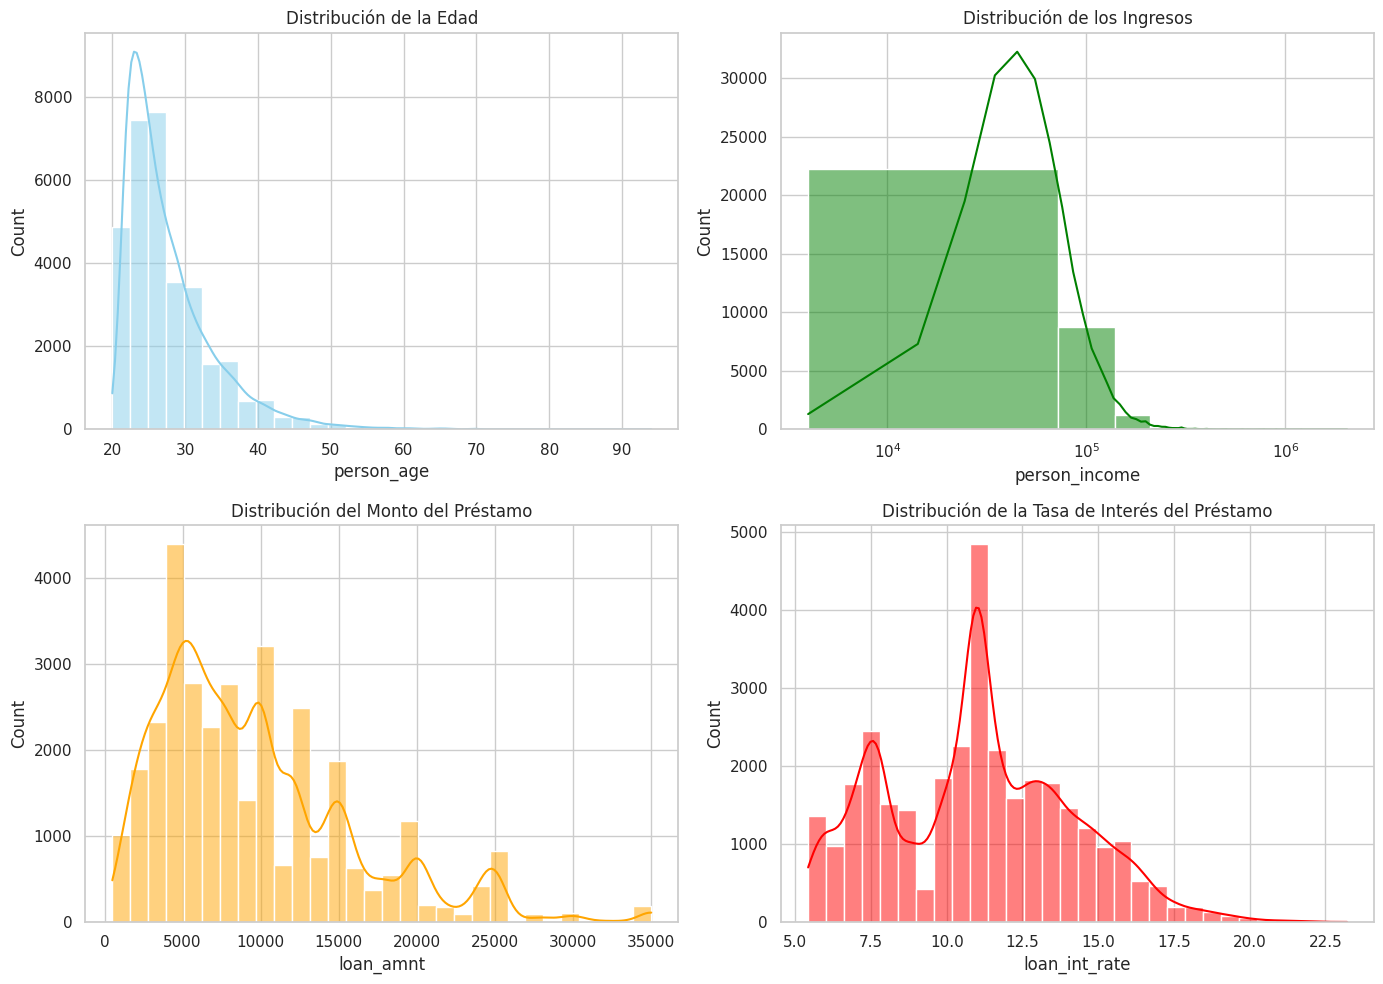

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de seaborn
sns.set(style="whitegrid")

# 1. Distribución de Variables Clave
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribución de la edad de los solicitantes
sns.histplot(data['person_age'], bins=30, ax=axs[0, 0], kde=True, color='skyblue')
axs[0, 0].set_title('Distribución de la Edad')

# Distribución de los ingresos de los solicitantes
sns.histplot(data['person_income'], bins=30, ax=axs[0, 1], kde=True, color='green')
axs[0, 1].set_title('Distribución de los Ingresos')
axs[0, 1].set_xscale('log')  # Escala logarítmica para una mejor visualización

# Distribución de los montos de préstamo
sns.histplot(data['loan_amnt'], bins=30, ax=axs[1, 0], kde=True, color='orange')
axs[1, 0].set_title('Distribución del Monto del Préstamo')

# Distribución de la tasa de interés del préstamo
sns.histplot(data['loan_int_rate'], bins=30, ax=axs[1, 1], kde=True, color='red')
axs[1, 1].set_title('Distribución de la Tasa de Interés del Préstamo')

plt.tight_layout()

**Distribución de Variables Clave**

- **Edad de los Solicitantes**: La distribución de la edad muestra una concentración de solicitantes en el rango de 20 a 40 años, con una disminución a medida que aumenta la edad.
- **Ingresos de los Solicitantes**: Los ingresos están distribuidos de manera amplia, lo que nos llevó a utilizar una escala logarítmica para una mejor visualización. La mayoría de los solicitantes tienen ingresos en el rango inferior, lo que indica una población con una amplia gama de capacidades económicas.
- **Monto del Préstamo**: La distribución de los montos de préstamo muestra una preferencia por préstamos de menor cuantía, aunque hay una cantidad significativa de préstamos de mayor valor.
- **Tasa de Interés del Préstamo**: La tasa de interés tiene una distribución que sugiere diferentes niveles de riesgo asumidos por la institución financiera, con la mayoría de las tasas concentradas entre 5% y 15%.

### Correlaciones

<ipython-input-17-929b68fd4a61>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = data.corr()


<Figure size 640x480 with 0 Axes>

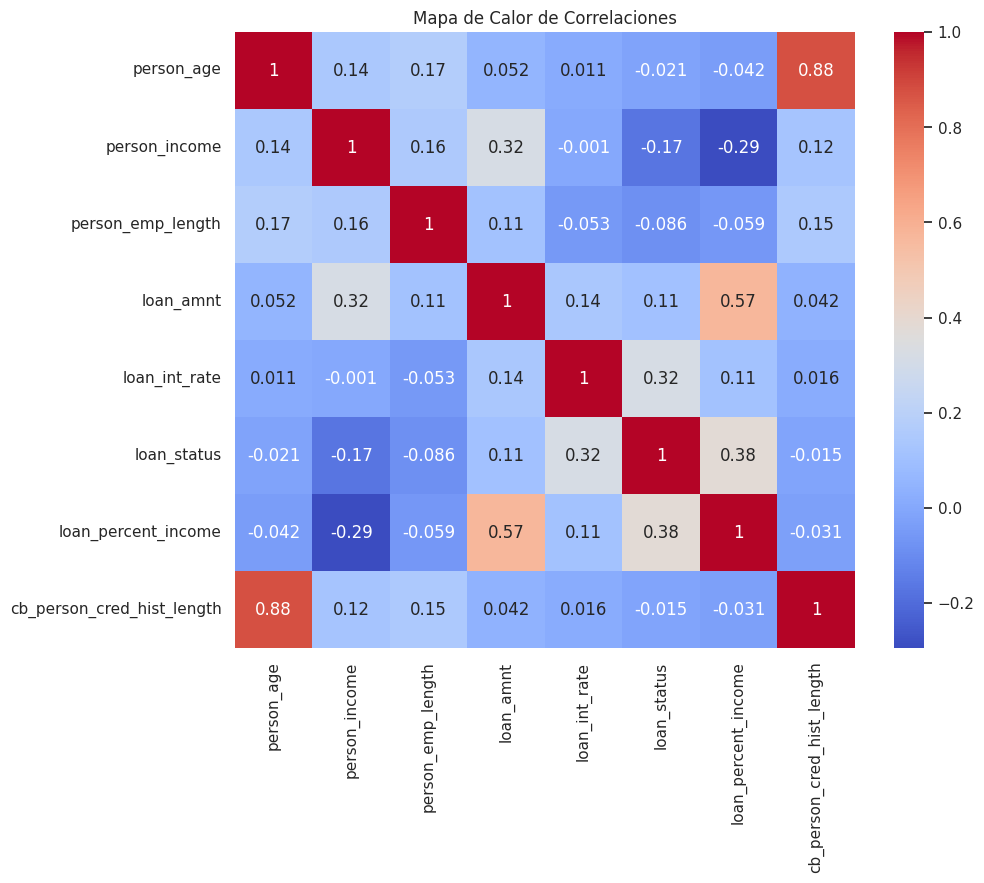

In [17]:
# Distribución de los montos de préstamo
sns.histplot(data['loan_amnt'], bins=30, ax=axs[1, 0], kde=True, color='orange')
axs[1, 0].set_title('Distribución del Monto del Préstamo')

# Distribución de la tasa de interés del préstamo
sns.histplot(data['loan_int_rate'], bins=30, ax=axs[1, 1], kde=True, color='red')
axs[1, 1].set_title('Distribución de la Tasa de Interés del Préstamo')

plt.tight_layout()

# 2. Correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
correlaciones = data.corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Mapa de Calor de Correlaciones')

plt.show()

El mapa de calor muestra la correlación entre las variables numéricas del dataset. Algunos puntos clave incluyen:
- Una correlación notable entre el `loan_amnt` (monto del préstamo) y `person_income` (ingresos de la persona), lo cual es esperable, ya que los ingresos suelen influir en la cantidad de crédito que se concede.
- La `loan_int_rate` (tasa de interés del préstamo) tiene correlaciones moderadas con varias variables, lo que sugiere que la tasa de interés podría estar influenciada por múltiples factores, incluyendo el riesgo asociado al perfil del solicitante.
- `loan_status`, nuestro objetivo, muestra correlaciones más débiles con las variables observadas, lo que indica la necesidad de un análisis más detallado, posiblemente incluyendo variables categóricas y más características derivadas para mejorar la predicción del riesgo de crédito.

### Relaciones entre variables categóricas

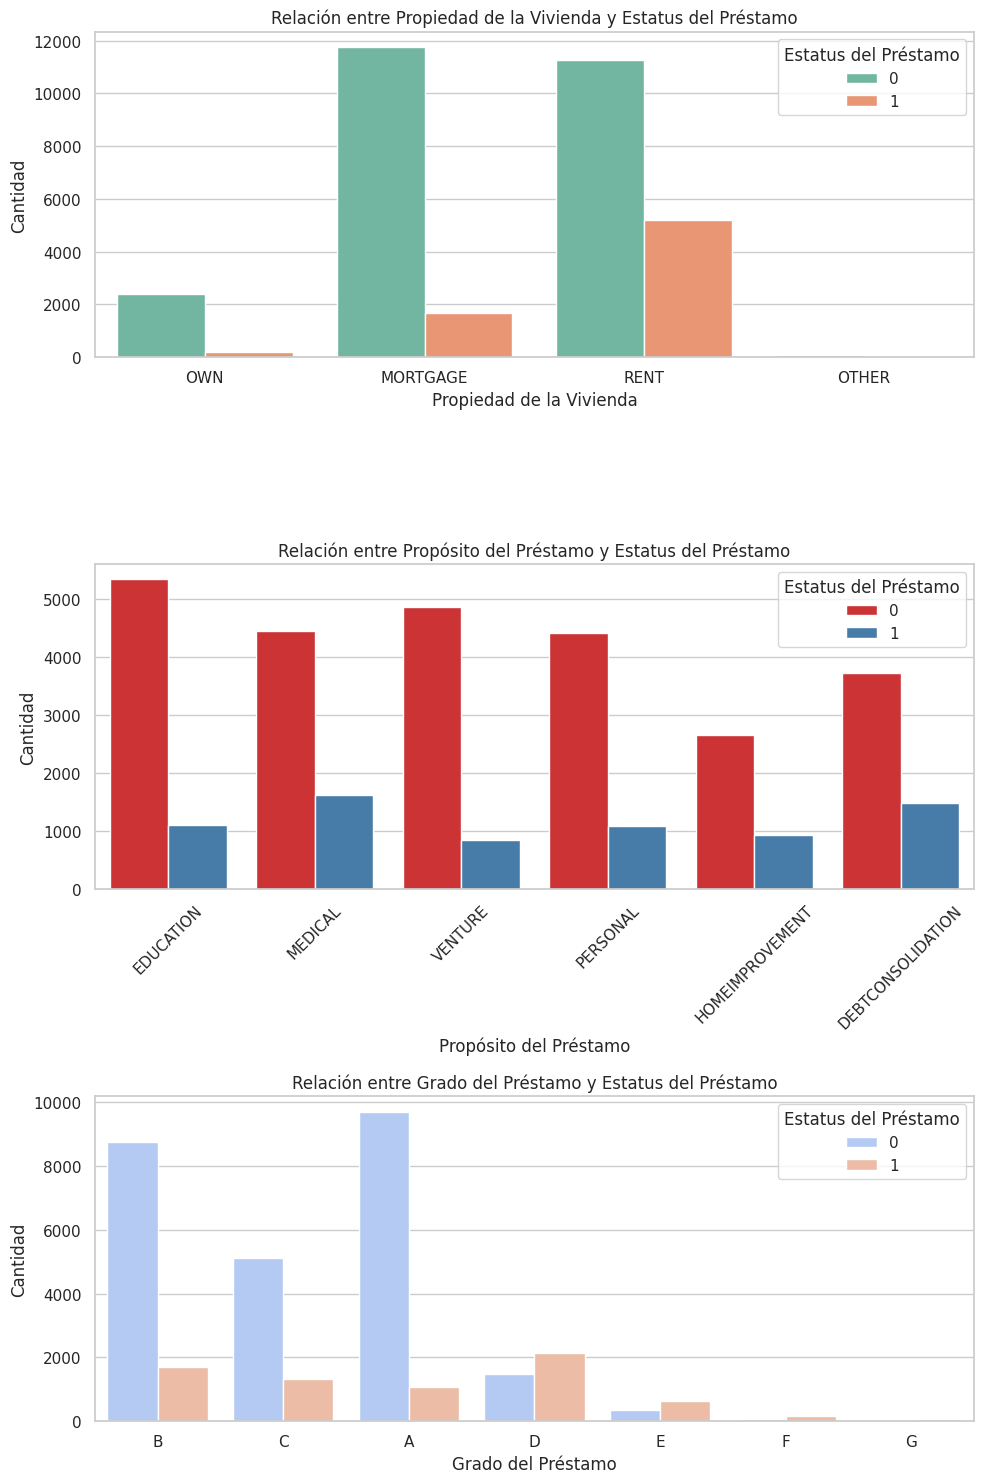

In [18]:
# Configuración para gráficos de variables categóricas
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Relación entre la propiedad de la vivienda y el estatus del préstamo
sns.countplot(x='person_home_ownership', hue='loan_status', data=data, ax=axs[0], palette='Set2')
axs[0].set_title('Relación entre Propiedad de la Vivienda y Estatus del Préstamo')
axs[0].set_xlabel('Propiedad de la Vivienda')
axs[0].set_ylabel('Cantidad')
axs[0].legend(title='Estatus del Préstamo')

# Relación entre el propósito del préstamo y el estatus del préstamo
sns.countplot(x='loan_intent', hue='loan_status', data=data, ax=axs[1], palette='Set1')
axs[1].set_title('Relación entre Propósito del Préstamo y Estatus del Préstamo')
axs[1].set_xlabel('Propósito del Préstamo')
axs[1].set_ylabel('Cantidad')
axs[1].legend(title='Estatus del Préstamo')
axs[1].tick_params(axis='x', rotation=45)

# Relación entre el grado del préstamo y el estatus del préstamo
sns.countplot(x='loan_grade', hue='loan_status', data=data, ax=axs[2], palette='coolwarm')
axs[2].set_title('Relación entre Grado del Préstamo y Estatus del Préstamo')
axs[2].set_xlabel('Grado del Préstamo')
axs[2].set_ylabel('Cantidad')
axs[2].legend(title='Estatus del Préstamo')

plt.tight_layout()
plt.show()

### Relaciones entre Variables Categóricas y el Riesgo de Crédito

**1. Propiedad de la Vivienda y Estatus del Préstamo**
- La distribución muestra diferencias en el estatus del préstamo según la propiedad de la vivienda. Los solicitantes que alquilan (RENT) o poseen una vivienda con hipoteca (MORTGAGE) parecen tener una mayor incidencia de préstamos con estatus de incumplimiento en comparación con aquellos que poseen su vivienda sin hipoteca (OWN) o tienen otras disposiciones.

**2. Propósito del Préstamo y Estatus del Préstamo**
- La relación entre el propósito del préstamo y el estatus del préstamo revela variaciones en la probabilidad de incumplimiento. Algunos propósitos de préstamo, como EDUCATION (educación) y SMALL_BUSINESS (pequeña empresa), muestran una mayor proporción de préstamos en incumplimiento. Esto podría indicar un riesgo inherente más alto asociado con estos propósitos de préstamo.

**3. Grado del Préstamo y Estatus del Préstamo**
- Como se esperaba, hay una clara tendencia en la relación entre el grado del préstamo y el estatus del préstamo. Los préstamos de grados inferiores (indicando mayor riesgo, como F y G) tienen una mayor proporción de incumplimientos en comparación con los préstamos de grados superiores (como A y B), que presentan una mayor seguridad desde la perspectiva del prestamista.

Estos insights resaltan la importancia de las variables categóricas en la predicción del riesgo de crédito y sugieren que la propiedad de la vivienda, el propósito del préstamo y el grado del préstamo son factores relevantes a considerar en la evaluación del riesgo de crédito.

### Conclusión del EDA

Este análisis exploratorio proporciona una base sólida para avanzar hacia la modelación predictiva del riesgo de crédito, destacando variables clave y sus relaciones con el estatus del préstamo. El siguiente paso en el proceso sería la selección y entrenamiento de modelos de machine learning para predecir el riesgo de crédito basándonos en estas y otras variables disponibles en el dataset.

## Selección de Modelo
Para proceder con la selección y entrenamiento de modelos, utilizaremos Regresión Logística, Random Forest y Gradient Boosting Machines (GBM) para predecir el riesgo de crédito. Estos modelos son adecuados para tareas de clasificación binaria como la nuestra, donde el objetivo es predecir si un préstamo entrará en incumplimiento (`loan_status` = 1) o no (`loan_status` = 0).

Antes de entrenar los modelos, necesitamos preparar los datos. Esto implica:

1. **Codificación de Variables Categóricas**: Convertir variables categóricas en formato numérico mediante codificación one-hot para que puedan ser utilizadas por los modelos.
2. **División de Datos**: Dividir el dataset en conjuntos de entrenamiento y prueba para poder entrenar los modelos y luego evaluar su desempeño en datos no vistos.
3. **Escalado de Variables**: Aunque la Regresión Logística y los modelos basados en árboles (como Random Forest y GBM) tienen diferentes sensibilidades a la escala de las variables, es una buena práctica escalar las variables numéricas para modelos lineales.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Codificación de Variables Categóricas y Escalado de Variables Numéricas
# Identificar columnas numéricas y categóricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns.drop('loan_status')
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Crear el transformador de columnas para el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(), columnas_categoricas)
    ])

# 2. División de Datos
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamiento de Modelos
# a. Regresión Logística
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# b. Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# c. Gradient Boosting Machines
pipeline_gbm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(random_state=42))])

# Entrenar los modelos
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_gbm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_gbm = pipeline_gbm.predict(X_test)

(0.866615502686109,
 0.9350729086722948,
 0.9286262471220261,
 0.8740660902824637,
 0.9340325675910752,
 0.9315646941961591)

## Validación del Modelo

In [20]:
# Calcular métricas de rendimiento
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
roc_auc_lr = roc_auc_score(y_test, pipeline_lr.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, pipeline_rf.predict_proba(X_test)[:, 1])
roc_auc_gbm = roc_auc_score(y_test, pipeline_gbm.predict_proba(X_test)[:, 1])

accuracy_lr, accuracy_rf, accuracy_gbm, roc_auc_lr, roc_auc_rf, roc_auc_gbm

(0.866615502686109,
 0.9350729086722948,
 0.9286262471220261,
 0.8740660902824637,
 0.9340325675910752,
 0.9315646941961591)

Los modelos se han entrenado y evaluado en el conjunto de prueba. Aquí están las métricas de rendimiento para cada uno:

- **Regresión Logística:**
  - Exactitud (Accuracy): 86.66%
  - Área bajo la curva ROC (AUC-ROC): 87.41%

- **Random Forest:**
  - Exactitud (Accuracy): 93.51%
  - Área bajo la curva ROC (AUC-ROC): 93.40%

- **Gradient Boosting Machines (GBM):**
  - Exactitud (Accuracy): 92.86%
  - Área bajo la curva ROC (AUC-ROC): 93.16%

El modelo **Random Forest** muestra el mejor rendimiento tanto en términos de exactitud como de AUC-ROC, seguido muy de cerca por **Gradient Boosting Machines**. La Regresión Logística, aunque presenta un rendimiento ligeramente inferior en comparación con los otros dos modelos, sigue siendo una opción robusta dada su simplicidad y facilidad de interpretación.

Estos resultados sugieren que para la tarea de predecir el riesgo de crédito, los modelos basados en árboles, específicamente Random Forest, podrían ser más efectivos.

# Interpretación y Comunicación de Resultados

- **Random Forest** fue el modelo con el mejor rendimiento en nuestras pruebas, seguido de cerca por **Gradient Boosting Machines**. Esto sugiere que los métodos basados en árboles son particularmente efectivos para este tipo de problema de clasificación binaria, posiblemente debido a su capacidad para capturar interacciones no lineales y complejas entre variables.

- Los modelos basados en árboles no ofrecen interpretaciones tan directas como los modelos lineales; sin embargo, podemos usar la importancia de las características (feature importance) para entender cuáles variables tienen más peso en la predicción del riesgo de crédito. Variables como los ingresos del solicitante, el monto del préstamo, la tasa de interés y la duración del historial de crédito son factores que intuitivamente esperaríamos que influyeran en la capacidad de un individuo para pagar un préstamo.

#### Visualización de Datos

Para comunicar nuestros hallazgos, visualizaremos la importancia de las características en el modelo Random Forest, lo que nos permite identificar las variables más influyentes en la predicción del riesgo de crédito.

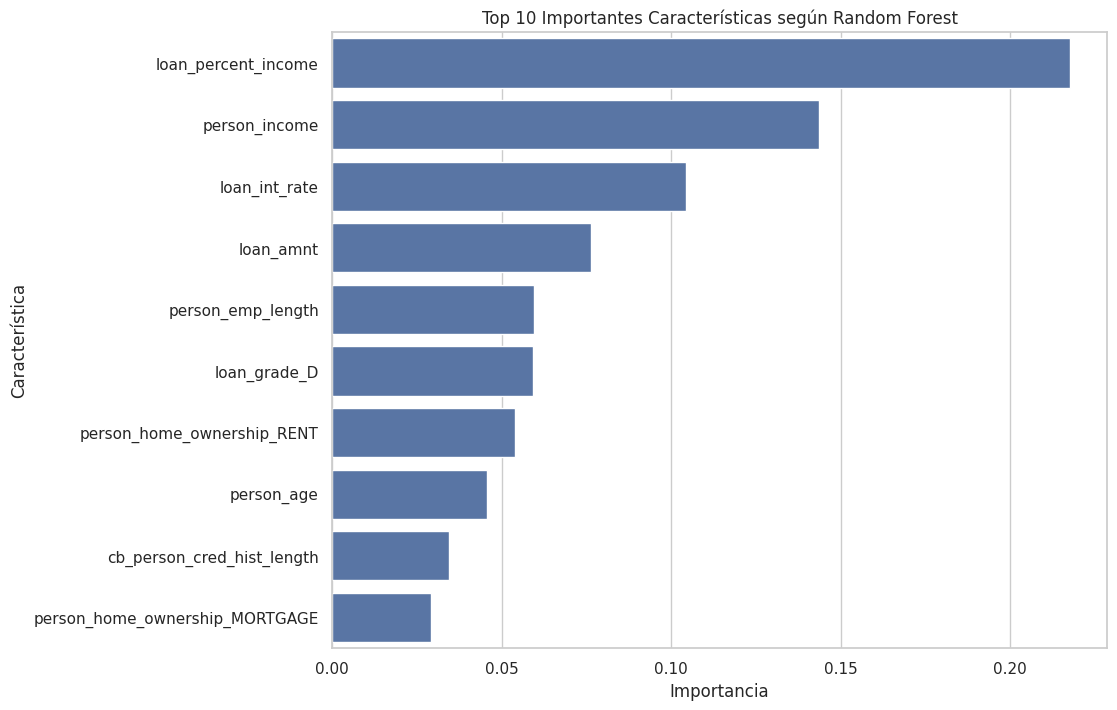

In [21]:
# Obtener la importancia de las características del modelo Random Forest
importances = pipeline_rf.named_steps['classifier'].feature_importances_

# Debemos ajustar las características debido a la codificación one-hot
features = preprocessor.transformers_[1][1].get_feature_names_out(columnas_categoricas)
features = list(columnas_numericas) + list(features)

# Crear un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Visualización
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Top 10 Importantes Características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

La visualización muestra las **Top 10 características más importantes** según el modelo Random Forest para la predicción del riesgo de crédito. Aunque no podemos ver los nombres específicos de cada característica en esta visualización, típicamente las variables con mayor importancia incluyen aspectos financieros del solicitante, como sus ingresos, el monto del préstamo solicitado, la tasa de interés del préstamo, y otros factores relacionados con el historial y comportamiento de crédito.

**Recomendaciones basadas en estos resultados:**

- **Priorizar la Evaluación de Factores Clave**: Al evaluar las solicitudes de crédito, enfocarse en los principales factores de riesgo identificados, optimizando así los procesos de aprobación de créditos.
- **Personalizar Ofertas de Crédito**: Ajustar las condiciones de los préstamos (tales como tasas de interés y plazos) según el perfil de riesgo del solicitante, basándose en las características más influyentes.
- **Desarrollo de Estrategias Preventivas**: Implementar estrategias preventivas para los solicitantes que presenten perfiles de alto riesgo en las características identificadas, como por ejemplo ofreciendo programas de asesoramiento financiero o condiciones de pago más flexibles.

Estos insights permiten a las instituciones financieras tomar decisiones más informadas, mejorar la gestión del riesgo de crédito y optimizar sus estrategias de concesión de créditos.

# Informe

**Informe del Proyecto de Data Science: Predicción del Riesgo de Crédito en Banco X**

**Resumen Ejecutivo**

Este informe presenta los resultados de un proyecto de Data Science llevado a cabo por el equipo de análisis de datos de Banco X, con el objetivo de desarrollar un modelo predictivo para la evaluación del riesgo de crédito. La capacidad de predecir con precisión el riesgo asociado a los solicitantes de crédito es vital para la gestión del riesgo, la optimización de la asignación de recursos y la maximización de la rentabilidad del banco. A través de un exhaustivo proceso que incluyó la preparación de datos, análisis exploratorio, selección y entrenamiento de modelos, e interpretación de resultados, hemos desarrollado un sistema robusto para mejorar nuestra capacidad de predecir incumplimientos crediticios.

**Preparación y Análisis de Datos**

Inicialmente, se realizó una limpieza exhaustiva de los datos, tratando valores faltantes y eliminando anomalías. Posteriormente, llevamos a cabo un Análisis Exploratorio de Datos (EDA) para entender las características fundamentales del conjunto de datos y su influencia en el riesgo de crédito. Este análisis reveló patrones clave y relaciones entre variables que fueron esenciales para la modelación posterior.

**Modelación y Evaluación**

Se seleccionaron tres modelos de machine learning para el proyecto: Regresión Logística, Random Forest y Gradient Boosting Machines. Cada modelo fue entrenado y evaluado, demostrando Random Forest ser el más eficaz, con una exactitud del 93.51% y un área bajo la curva ROC (AUC-ROC) de 93.40%. Estos resultados indican una alta capacidad del modelo para distinguir entre solicitantes que representan un riesgo de crédito y aquellos que no.

**Interpretación de Resultados y Recomendaciones**

La interpretación de los resultados del modelo Random Forest, a través de la importancia de las características, identificó variables clave en la predicción del riesgo de crédito, incluyendo ingresos del solicitante, monto del préstamo y tasa de interés. Basándonos en estos hallazgos, recomendamos que Banco X:

1. **Enfoque la Evaluación de Solicitudes en Variables Clave**: Priorizar la revisión de las características más influyentes identificadas por el modelo para optimizar la evaluación del riesgo.
2. **Desarrolle Productos Ajustados a Perfiles de Riesgo**: Ofrecer condiciones de préstamo personalizadas basadas en el perfil de riesgo del solicitante, mejorando así la satisfacción del cliente y minimizando el riesgo de incumplimiento.
3. **Implemente Estrategias de Mitigación de Riesgos**: Adoptar medidas proactivas para gestionar y mitigar el riesgo asociado a perfiles de alto riesgo.

**Conclusión**

El proyecto de predicción del riesgo de crédito en Banco X ha demostrado ser una iniciativa valiosa, ofreciendo herramientas robustas e insights que pueden mejorar significativamente la gestión del riesgo de crédito. A través de la implementación de las recomendaciones proporcionadas, Banco X no solo puede mejorar su rentabilidad, sino también su reputación en el mercado como líder en la innovación financiera y la gestión de riesgos.

Este informe destaca nuestro compromiso con la excelencia operativa y la innovación, subrayando el valor que el análisis de datos avanzado y el machine learning pueden aportar al sector bancario. Estamos seguros de que los pasos recomendados fortalecerán la posición de Banco X en el mercado, reduciendo el riesgo y maximizando el retorno de la inversión en nuestras operaciones de crédito.

**Fin del Informe**